## Практична робота №8. Жадібні алгоритми. Наближене розв’язання екстремальних задач
## Виконав: Буханцев Максим

## 1. Розв’язати задачу комівояжера (варіант 4)

In [3]:
import itertools

# Вершини
nodes = [1, 2, 3, 4]

# Ребра у вигляді словника для швидкого доступу
edges = {
    (1, 2): 3, (2, 1): 3,
    (1, 3): 5, (3, 1): 5,
    (1, 4): 7, (4, 1): 7,
    (2, 3): 6, (3, 2): 6,
    (2, 4): 2, (4, 2): 2,
    (3, 4): 4, (4, 3): 4,
}

# Ініціалізуємо мінімальну довжину
min_cost = float('inf')
best_path = []

# Перебираємо всі перестановки вершин, окрім стартової
for perm in itertools.permutations(nodes[1:]):
    path = [1] + list(perm) + [1]  # шлях повертається у початкову точку
    cost = 0
    valid = True
    for i in range(len(path) - 1):
        if (path[i], path[i+1]) in edges:
            cost += edges[(path[i], path[i+1])]
        else:
            valid = False
            break
    if valid and cost < min_cost:
        min_cost = cost
        best_path = path

print("Найкращий маршрут:", best_path)
print("Мінімальна вага:", min_cost)

Найкращий маршрут: [1, 2, 4, 3, 1]
Мінімальна вага: 14


## 2. Візуалізація графа

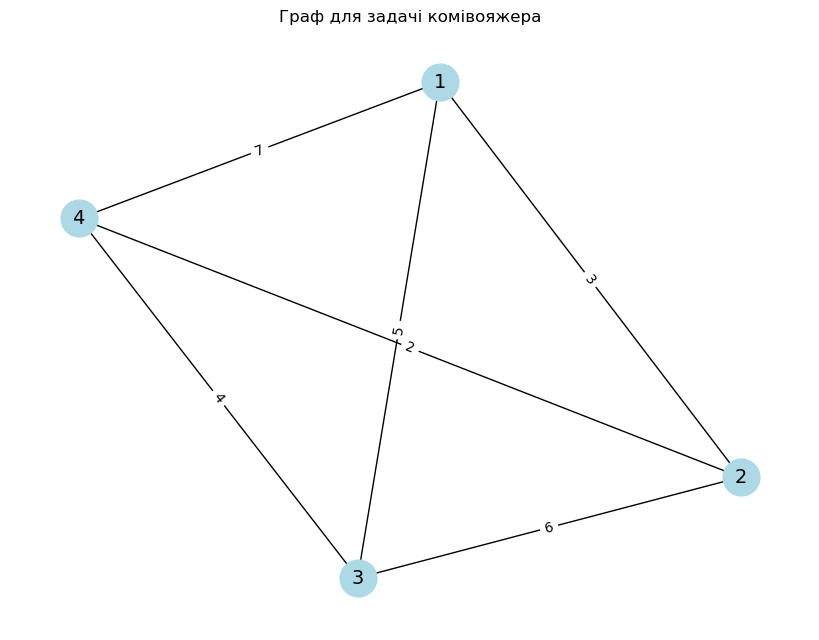

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()
for u, v, w in [(1,2,3), (1,3,5), (1,4,7), (2,3,6), (2,4,2), (3,4,4)]:
    G.add_edge(u, v, weight=w)

# Візуалізація
pos = nx.spring_layout(G, seed=42)
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Граф для задачі комівояжера")
plt.show()

## 3. Обґрунтування асимптотики для обох алгоритмів

#### Груба сила — `O(n!)`

- Метод повного перебору всіх можливих маршрутів між вершинами.
- Для `n` вершин існує `(n - 1)!` можливих шляхів (без урахування повернення у початкову точку).
- Для кожного маршруту обчислюється сумарна вага, що потребує `O(n)` операцій.
- Загальна складність: `O(n! * n)`, але прийнято вказувати як `O(n!)`, оскільки факторіал зростає швидше, ніж лінійний множник.

#### Найближчий сусід — `O(n² · log n)`

- На кожному кроці обирається вершина, яка найближча до поточної серед ще не відвіданих.
- Для вибору найближчої вершини можна використовувати мін-кучу (пріоритетну чергу) з часом доступу `O(log n)`.
- Алгоритм виконується `n` разів (по кількості вершин), і для кожної вершини здійснюється до `n` перевірок відстаней.
- Отже, складність: `O(n² · log n)`


## Контрольні питання

#### 1. Що таке жадібний алгоритм?
Жадібний алгоритм приймає локально оптимальне рішення на кожному кроці з надією, що глобальний результат буде оптимальним.

#### 2. Головні принципи роботи жадібних алгоритмів:
- Вибір найкращого варіанту "тут і зараз"
- Не змінює вже зроблені рішення
- Працює швидко, але не завжди дає оптимальний результат
#### 3. Головна відмінність від динамічного програмування:
Жадібні алгоритми не зберігають попередні обчислення, а динамічне програмування будує рішення на основі вже знайдених оптимальних підзадач.

#### 4. Приклади задач для жадібних алгоритмів:
- Задача здачі решти (монети)
- Кодування Хаффмана
- Найближчий сусід у комівояжері
#### 5. Обмеження жадібних алгоритмів:
Не завжди знаходять глобальний оптимум. Підходять лише тоді, коли є гарантії оптимальності локального вибору.

#### 6. Чому вони популярні для наближених рішень:
Жадібні алгоритми працюють швидко і прості у реалізації. Навіть якщо не оптимальні — часто дають хороші наближені рішення.